## 1. Structure & Guidelines

The most important thing to do is define your problem statement (with your partner). This will be your nexus and will help you choose the dataset. Ideally this is the problem that you work on for the rest of the project. Since this is a big decision, you can change the problem statement and the dataset in the next assignment but no changes after that.

### Where to look for a dataset
There are too many sources for me to name all of them. **Kaggle** is the most popular. To search you can just use google or **Google Dataset Search** specifically. A lot of universities have their datasets available, like the one I use in my example below, which can be a great resource too. 


### EDA Study
Here are some mandatory material to help you get a basic understanding:
- https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
- https://www.youtube.com/watch?v=9m4n2xVzk9o

The sky is the limit with EDA, use this as a starting point and I expect you to go beyond. For instance I personally love this free book https://jakevdp.github.io/PythonDataScienceHandbook/ that dives deep into data science with python. <br>
This book is entirely in jupyter notebooks for even more code examples: https://allendowney.github.io/ElementsOfDataScience/



## 2. Assignment Questions/Tasks

1) Brainstorm & write down a problem statement
2) Find a Dataset(s) that will help you solve your problem
3) EDA Study: Go through the guides I link above and my example to get different perspective of how to approach EDA
4) Start your EDA by emulating the steps I take below and start forming hypotheses about the dataset and getting insights
5) Use 5 more visualizations or techniques of your choice that I dont use below
6) Write down insights about the dataset and how it relates back to your problem!!

## 3. Exploratory Data Analysis

This is the same example from class. I have kept things basic and barebones here so this can serve as a springboard for your analyses. In each step I have added some questions you should ask to get insights into the dataset. The answers to these and other questions that you ask might be through more statistical analysis and visualizations!

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from ucimlrepo import fetch_ucirepo 

sns.set(style="whitegrid")

### 1. Data Loading & Quick Overview

In [100]:
#Your dataset here
#adult_income_dataset = fetch_ucirepo(id=2) #details here https://archive.ics.uci.edu/dataset/2/adult, click on the import in python button to check it out
#df = adult_income_dataset.data.original
import pandas as pd

# Load your laptop dataset
df = pd.read_csv("laptops_dataset.csv")

# Quick check of the first 5 rows
print(df.head())

# Basic info about columns and missing values
print(df.info())


                                        product_name  overall_rating  \
0  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
1  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
2  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
3  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   
4  Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...             4.7   

  no_ratings no_reviews  rating             title  \
0     15,210        900       5  Perfect product!   
1     15,210        900       5         Fabulous!   
2     15,210        900       5         Fabulous!   
3     15,210        900       4        Delightful   
4     15,210        900       5           Awesome   

                                              review  
0  Loved it, it's my first MacBook that I earned ...  
1  Battery lasted longer than my first relationsh...  
2  Such a great deal.. very happy with the perfor...  
3  Awesome build quality and

In [101]:
# Display first few rows
df.describe()

,overall_rating,rating
count,24113.000000,24113.000000
mean,4.186273,4.214573
std,0.228392,1.184845
min,3.300000,1.000000
25%,4.100000,4.000000
50%,4.200000,5.000000
75%,4.300000,5.000000
max,5.000000,5.000000


#### Questions to ponder: 

1. Does the data match your expectations or do you think you might need more information?
2. Do the columns/features align with your problem statement?
3. Any immediate signs of missing or corrupted data? 


### 2. Shape & Features

In [102]:
# Shape : (rows, columns)
print(f"Dataset shape: {df.shape}")

# Display all column names
print("\nFeature Names:")
print(df.columns.tolist())

Dataset shape: (24113, 7)

Feature Names:
['product_name', 'overall_rating', 'no_ratings', 'no_reviews', 'rating', 'title', 'review']


#### Questions to ponder: 

1. Is the data large enough for the analysis?
2. Are there any duplicate columns, or columns with similar information or ones that need re-naming? (I renamed some columns in my dataset below)

In [103]:
#replacing "-" with "_"
df.columns = df.columns.str.replace("-","_")
df.columns

Index(['product_name', 'overall_rating', 'no_ratings', 'no_reviews', 'rating',
       'title', 'review'],
      dtype='object')

In [104]:
#Get unique target values
#df['income'].unique()
df['overall_rating'].unique()      # Get all unique laptop brands
df['product_name'].unique()



array(['Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/Mac OS Monterey)...',
       'HP Backlit Intel Core i5 12th Gen 1235U - (8 GB/512 GB SSD/Win...',
       'DELL Inspiron 3520 Intel Core i3 12th Gen 1215U - (8 GB/512 GB...',
       'Lenovo Chromebook MediaTek Kompanio 520 - (4 GB/128 GB EMMC St...',
       'SAMSUNG Galaxy Book4 Metal Intel Core i3 13th Gen 1315U - (8 G...',
       'DELL Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 1...',
       'SAMSUNG Galaxy Book4 Intel Core i5 13th Gen 1335U - (16 GB/512...',
       'ASUS Vivobook Go 14 AMD Ryzen 3 Quad Core 7320U - (8 GB/512 GB...',
       'HP Laptop Intel Core i3 12th Gen 1215U - (8 GB/256 GB SSD/Wind...',
       'HP (15s-fq5007TU) Intel Core i3 12th Gen 1215U - (8 GB/512 GB ...',
       'Acer Aspire 7 Intel Core i5 12th Gen 12450H - (16 GB/512 GB SS...',
       'Lenovo V14 Intel Core i5 12th Gen 1235U - (8 GB/512 GB SSD/Win...',
       'Primebook Wifi MediaTek MT8183 - (4 GB/64 GB EMMC Storage/Prim...',
       'CHUW

### 3. Data Types & Missing Values

In [105]:
# understanding the datatypes
df.dtypes

product_name       object
overall_rating    float64
no_ratings         object
no_reviews         object
rating              int64
title              object
review             object
dtype: object

In [106]:
# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
dtype: int64


#### Questions to ponder: 

- Should we drop or impute missing values?
- Could missing data be an insight in and of itself?

### 4. Summary Statistics & Outlier Detection

In [107]:
#Summary Stats
df.describe()

,overall_rating,rating
count,24113.000000,24113.000000
mean,4.186273,4.214573
std,0.228392,1.184845
min,3.300000,1.000000
25%,4.100000,4.000000
50%,4.200000,5.000000
75%,4.300000,5.000000
max,5.000000,5.000000


#### Question to ponder
- Did you expect outliers? 
- Which features have unusually high or low values? What do they tell us about the data?
- Are there any suspicious patterns or extreme outliers?
- Do we need to drop or transform these outliers?

In [108]:
df.dtypes

product_name       object
overall_rating    float64
no_ratings         object
no_reviews         object
rating              int64
title              object
review             object
dtype: object

In [109]:
#df["capital_gain"].value_counts().head(20)
df['product_name'].value_counts().head(20)  
df['no_ratings'].sort_values(ascending=False).head(20) 



21771    99
21770    99
21769    99
21768    99
21767    99
21766    99
21765    99
21764    99
21763    99
15079    97
15082    97
15081    97
15080    97
15078    97
12835    96
4733     96
4732     96
4734     96
4735     96
4736     96
Name: no_ratings, dtype: object

### 5. Univariate Analysis

In [110]:
print(df.select_dtypes(include='number').columns)
num_features = ['overall_rating', 'no_ratings', 'no_reviews', 'rating']



Index(['overall_rating', 'rating'], dtype='object')


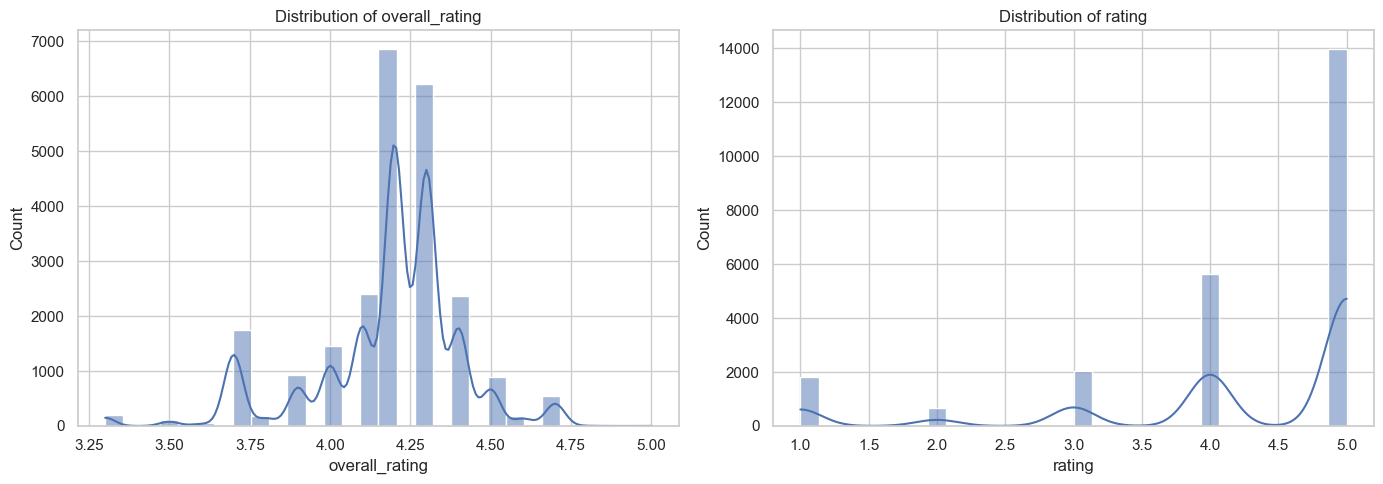

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['overall_rating', 'rating']

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, bins=30, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


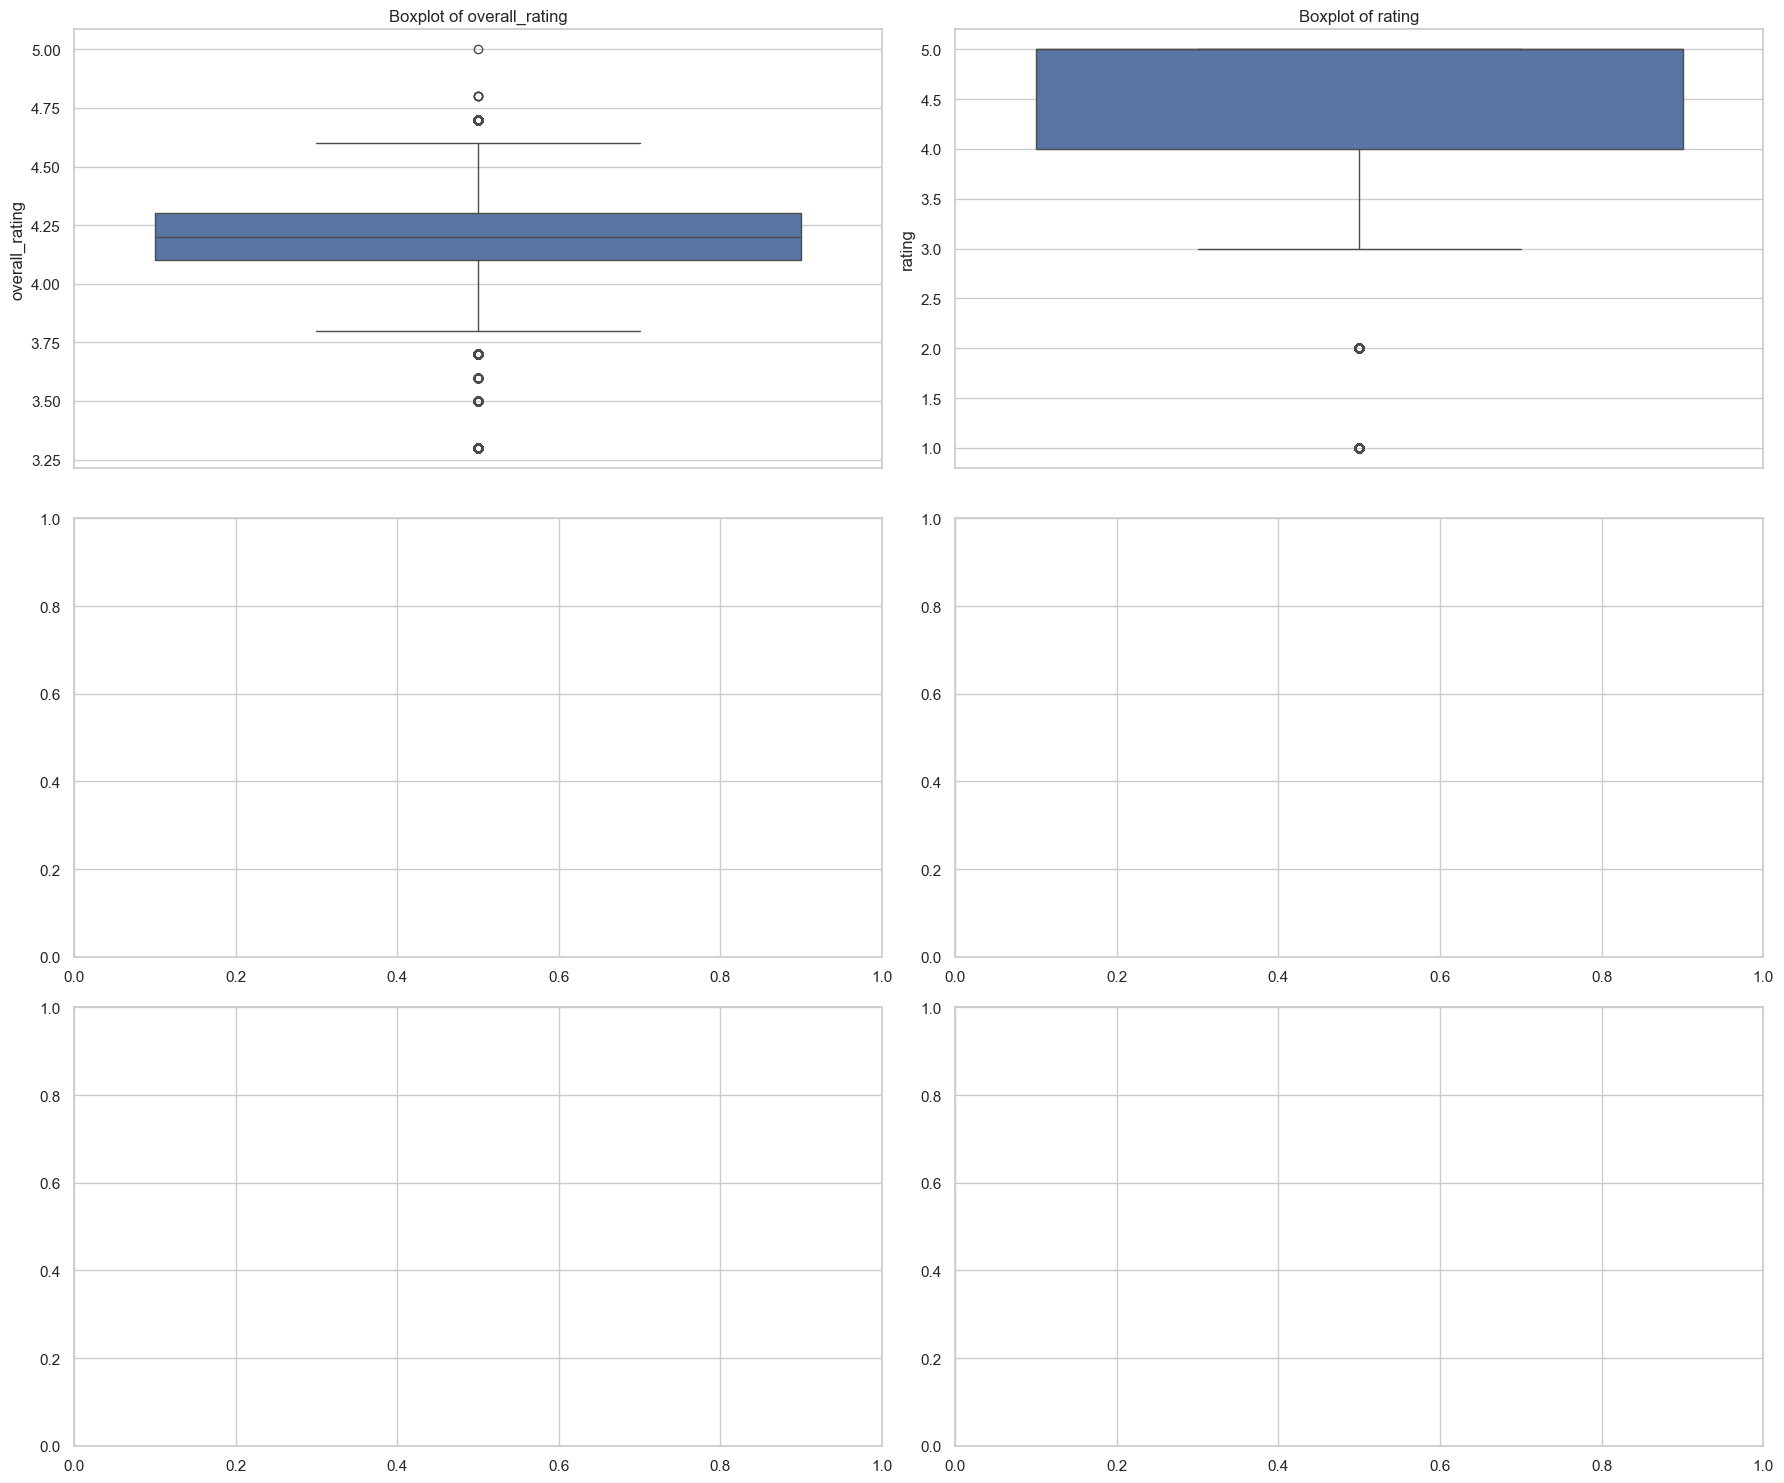

In [112]:
# Create boxplots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.boxplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


In [113]:
df.columns

Index(['product_name', 'overall_rating', 'no_ratings', 'no_reviews', 'rating',
       'title', 'review'],
      dtype='object')

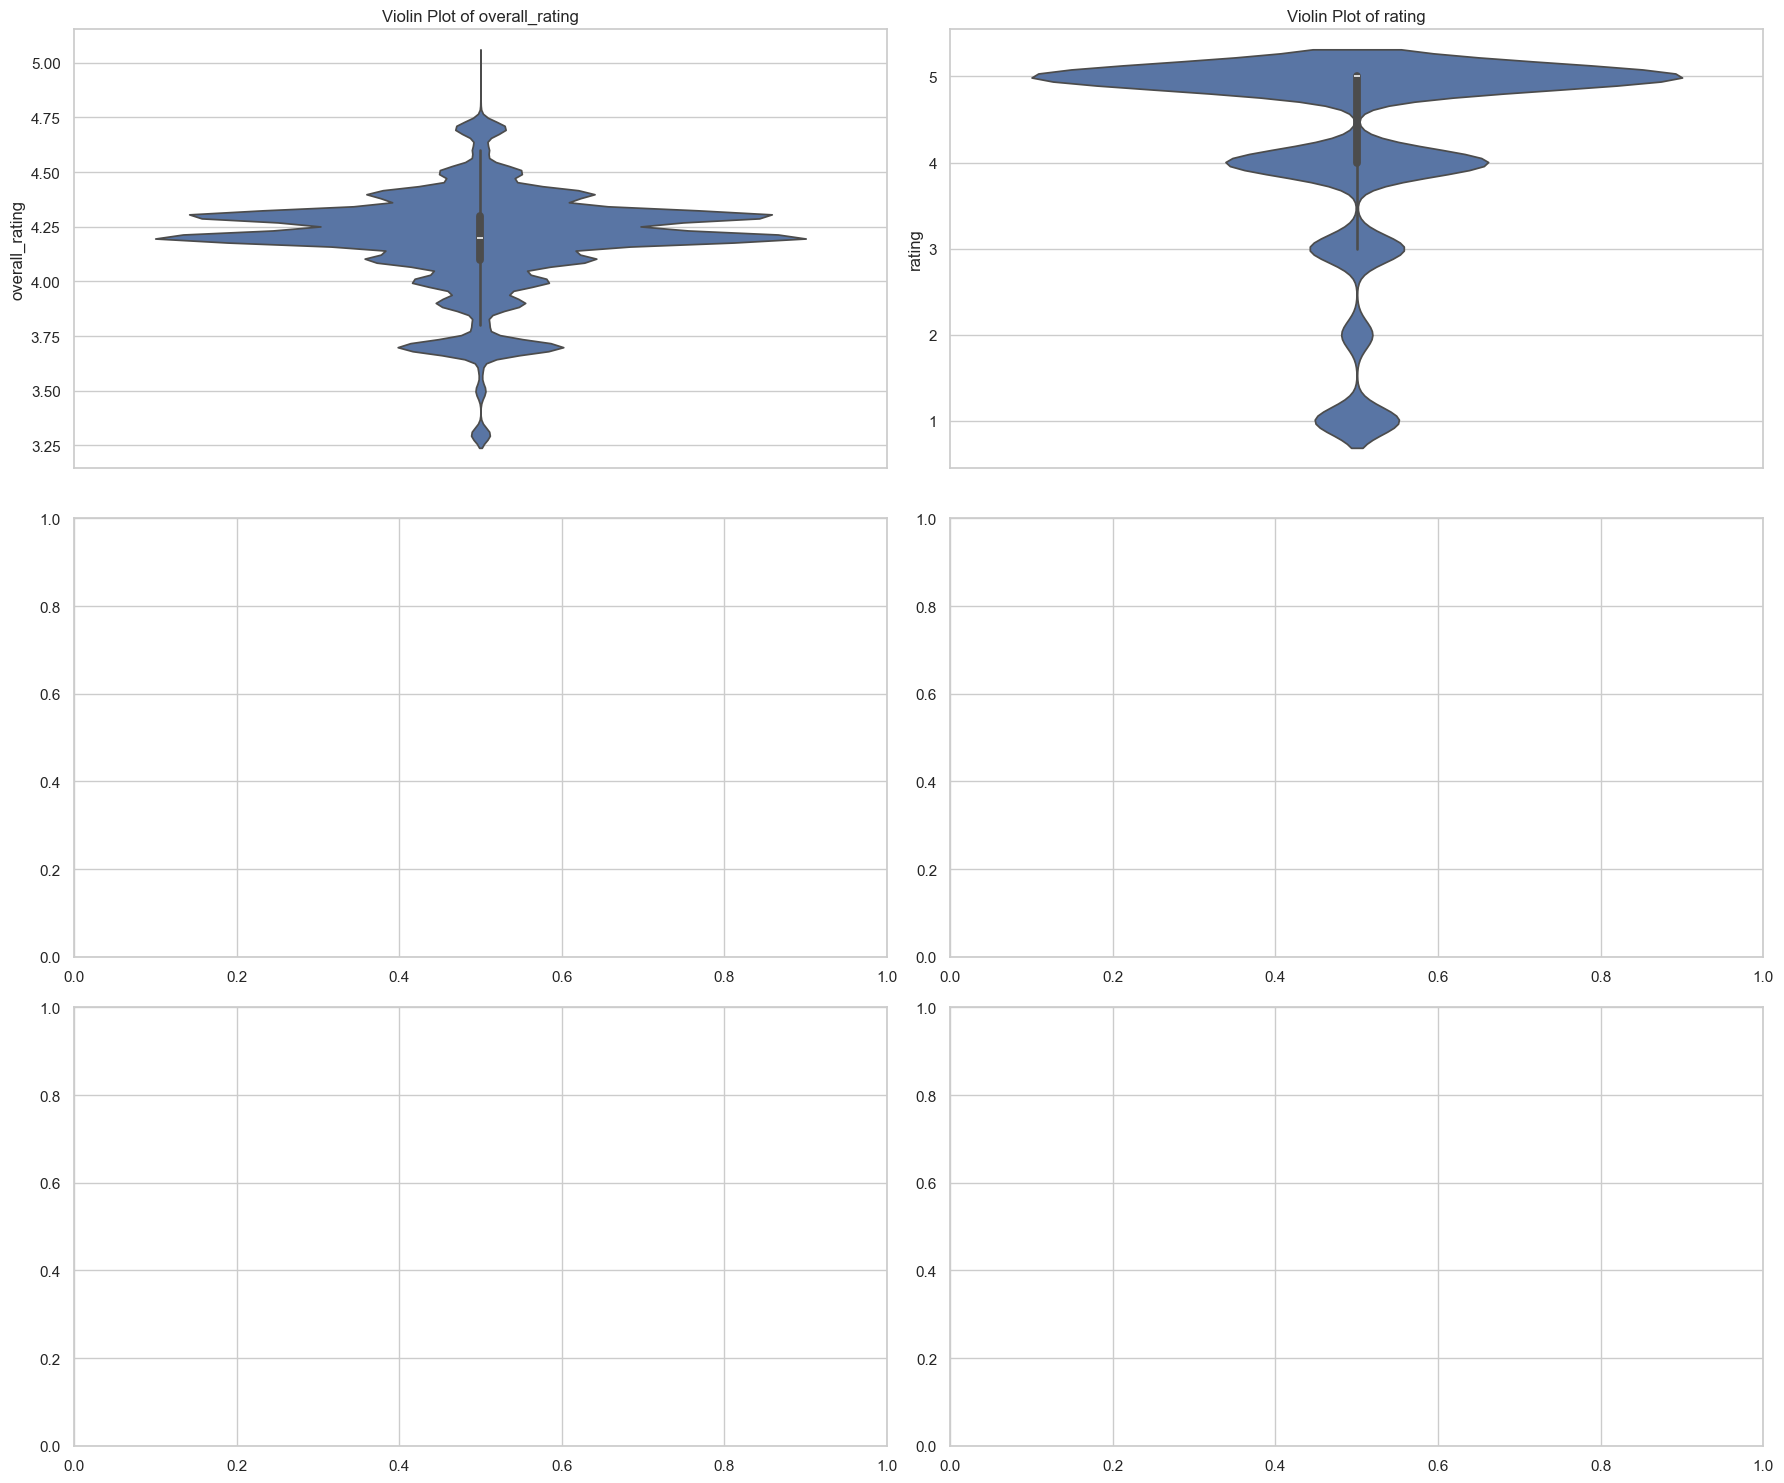

In [114]:
# Create violin plots for numerical variables
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

for i, feature in enumerate(num_features):
    row, col = divmod(i, 2)
    sns.violinplot(y=df[feature], ax=ax[row, col])
    ax[row, col].set_title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()


In [115]:
print(df.select_dtypes(include='object').columns)


Index(['product_name', 'no_ratings', 'no_reviews', 'title', 'review'], dtype='object')


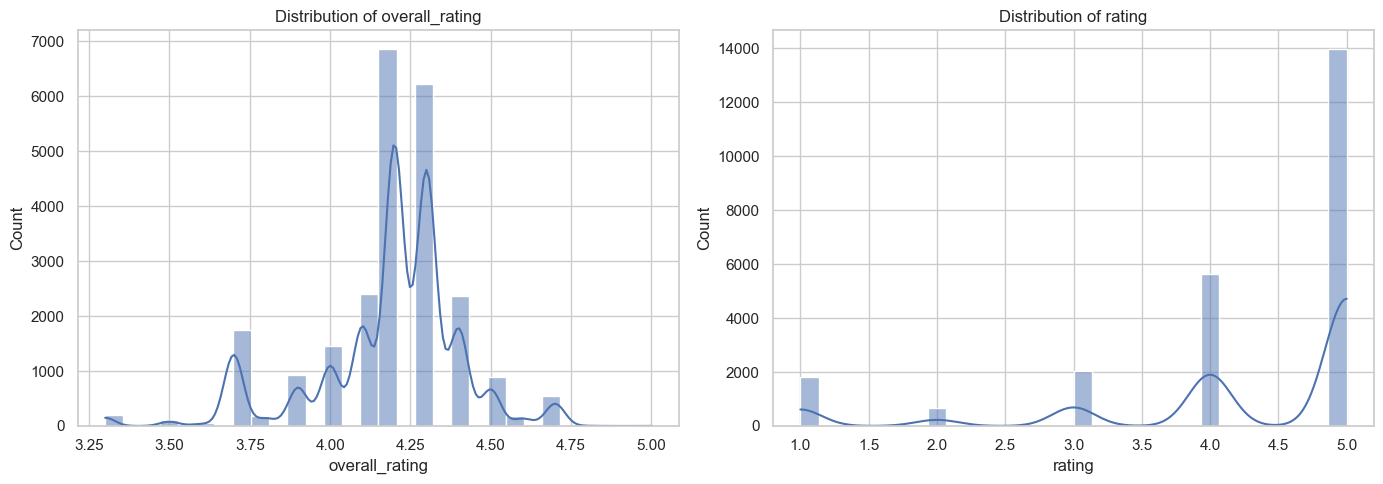

In [116]:
# Numeric (Univariate) Analysis for Laptop Dataset
# Visualizing distributions for 'overall_rating' and 'rating'

# Choose the numeric columns
num_features = ['overall_rating', 'rating']

# Create subplots: 1 row, 2 columns (one plot for each numeric feature)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  # Wider figure for two plots

# Loop through numeric features and create histograms
for i, feature in enumerate(num_features):
    # sns.histplot will create a histogram with a KDE (smooth curve)
    sns.histplot(df[feature], kde=True, bins=30, ax=ax[i])
    
    # Set title for each subplot
    ax[i].set_title(f'Distribution of {feature}')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Count')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the plots
plt.show()


#### Questions to ponder:

- Are the numerical features skewed or roughly normal?
- Which categories dominate in each categorical feature? What does that tell you about each feature? 


### 6. Bivariate Analysis

In [ ]:

# 1️⃣ SCATTER PLOT: Numerical vs. Numerical
# We'll see the relationship between 'rating' and 'overall_rating'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='rating', y='overall_rating')
plt.title("Rating vs Overall Rating")
plt.xlabel("Rating")
plt.ylabel("Overall Rating")
plt.show()

# 2️⃣ GROUPED BAR PLOT: Categorical vs. Categorical
# We convert 'rating' into categories for a better comparison across products
df['rating_category'] = pd.cut(df['rating'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, 
    x='product_name', 
    hue='rating_category', 
    order=df['product_name'].value_counts().head(10).index
)
plt.title("Top 10 Products by Rating Category")
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Rating Category')
plt.show()

# 3️⃣ BOX PLOT: Numerical vs. Categorical
# Show the distribution of overall ratings for the top 10 most frequent products
top_products = df['product_name'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[df['product_name'].isin(top_products)], 
    x='product_name', 
    y='overall_rating'
)
plt.title("Overall Rating Distribution by Top 10 Products")
plt.xlabel("Product Name")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `age` for `x`. An entry with this name does not appear in `data`.

#### Questions to ponder

- Which numerical features are correlated?
- Do certain categories strongly associate with higher or lower numerical values?
- Any visible clusters or patterns in scatter plots?

### 7. Multivariate Analysis

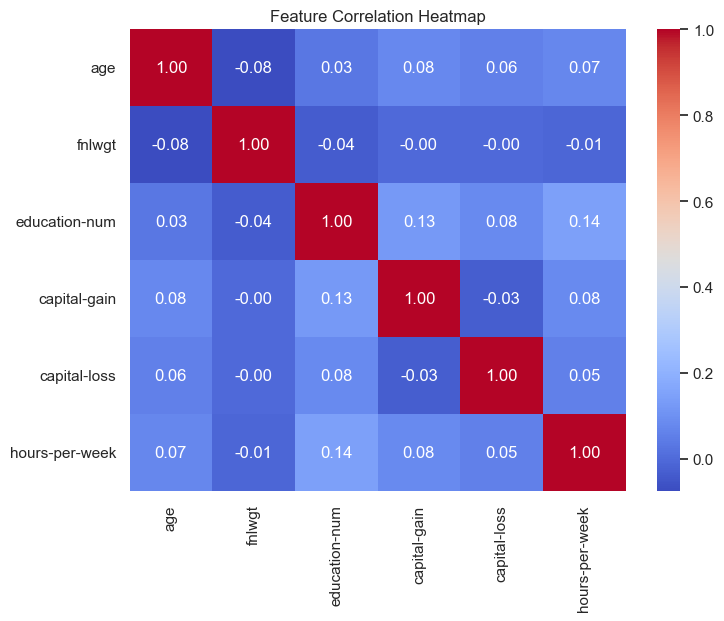

In [ ]:
# Create a correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#### Questions to ponder

- Which features show strong correlation?
- Should we remove or combine highly correlated features?
- Are there surprising correlations that warrant deeper investigation?

### 8. Next Steps

- Which features appear most important for the problem?
- What data cleaning or transformation steps remain?
- How will these insights guide the next phase (modeling, reporting, or business decisions)?

## Resources
- Another amazing free book I have used : https://greenteapress.com/thinkstats/thinkstats.pdf
- https://towardsdatascience.com/data-science-101-life-cycle-of-a-data-science-project-86cbc4a2f7f0/